In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.options.display.max_rows = 10
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML

In [2]:
# generated by the uniform dis- tribution [−1; 1]
x = np.random.uniform(low=-1, high=1, size=(1000,2))

df = pd.DataFrame(x, columns=['x1', 'x2'])

display(HTML(df.head(10).to_html()))
display(HTML(df.describe().to_html()))

,x1,x2
0,0.679050,0.497019
1,0.340431,-0.641819
2,-0.751596,-0.600001
3,0.794755,-0.957813
4,0.064490,0.533102
5,0.525142,-0.243496
6,0.789690,0.712396
7,-0.403008,-0.662337
8,-0.547994,0.611758
9,0.929595,0.718989


,x1,x2
count,1000.000000,1000.000000
mean,0.005016,-0.001229
std,0.568826,0.582569
min,-0.999728,-0.998741
25%,-0.484592,-0.520914
50%,0.015981,0.015633
75%,0.478286,0.497350
max,0.995000,0.999860


,x1,x2,x1^2,x2^2,x1*x2,y
0,0.679050,0.497019,0.461109,0.247028,0.337501,4.153669
1,0.340431,-0.641819,0.115893,0.411931,-0.218495,0.833263
2,-0.751596,-0.600001,0.564897,0.360001,0.450958,-0.584076
3,0.794755,-0.957813,0.631635,0.917405,-0.761226,2.276508
4,0.064490,0.533102,0.004159,0.284198,0.034380,0.710947
5,0.525142,-0.243496,0.275774,0.059290,-0.127870,2.587217
6,0.789690,0.712396,0.623610,0.507508,0.562572,4.265778
7,-0.403008,-0.662337,0.162416,0.438691,0.266927,0.203986
8,-0.547994,0.611758,0.300298,0.374247,-0.335240,-1.532175
9,0.929595,0.718989,0.864147,0.516945,0.668368,5.422106


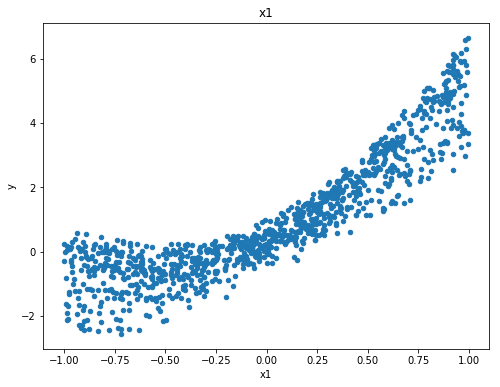

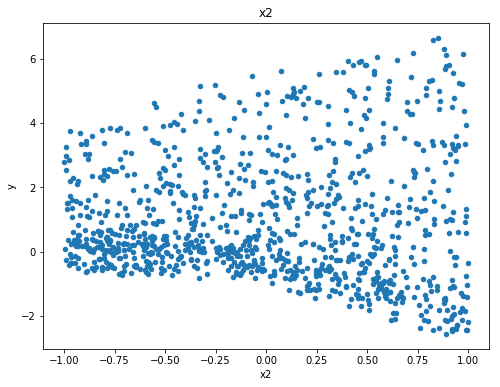

In [3]:
#y = 2x21 − 0.6x2 + 1.5x1x2 + x1 + 2x2 + ε

# ε random N (0, 1)
e = np.random.rand(1000,)

# compute quadratic features
df['x1^2'] = df['x1']*df['x1']
df['x2^2'] = df['x2']*df['x2']
df['x1*x2'] = df['x1']*df['x2']

# compute y
df['y'] = 2*(df['x1']*df['x1'])-0.6*(df['x2']*df['x2'])+1.5*df['x1']*df['x2']+df['x1']+2*df['x1']+e

display(HTML(df.head(10).to_html()))

df.plot(kind='scatter',x='x1',y='y', stacked=False, figsize=(8,6), title='x1')

df.plot(kind='scatter',x='x2',y='y', stacked=False, figsize=(8,6), title='x2')

# Training

In [4]:
from sklearn import linear_model

# data
X = df.drop(['y'], axis=1)
y = df['y']

# linear regreesion with quadratic features
lr = linear_model.LinearRegression(normalize=False)
lr.fit(X,y)

weights = lr.coef_.round(4).reshape(1,5)
weights_df = pd.DataFrame(weights, columns=X.columns.values)

print('quadratic function')
display(HTML(weights_df.to_html()))

quadratic function


,x1,x2,x1^2,x2^2,x1*x2
0,2.9884,0.0177,2.0021,-0.6202,1.5366


In [5]:
def qfunc(x1,x2,w):
    sum = 0;
    sum += w[0][0]*x1
    sum += w[0][1]*x2
    sum += w[0][2]*x1*x1
    sum += w[0][3]*x2*x2
    sum += w[0][4]*x1*x2
    #print(sum)
    return sum

In [6]:
result = df[['x1','x2','y']]
#result['qfunc'] = qfunc(result['x1'],result['x2'],weights)

q = []

for i in range(result.shape[0]):
    v = qfunc(result['x1'][i],result['x2'][i],weights)
    q.append(v)
    
result['qfunc'] = q
result['err'] = np.absolute(result['y'] - result['qfunc'])

display(HTML(result.head(10).to_html()))
display(HTML(result.describe().to_html()))

# mean of absoulte error
print('mean of absoulte error (MAE): ',result.describe().loc['mean']['err'])

,x1,x2,y,qfunc,err
0,0.679050,0.497019,4.153669,3.326653,0.827017
1,0.340431,-0.641819,0.833263,0.646794,0.186469
2,-0.751596,-0.600001,-0.584076,-0.656040,0.071964
3,0.794755,-0.957813,2.276508,1.884014,0.392495
4,0.064490,0.533102,0.710947,0.087054,0.623894
5,0.525142,-0.243496,2.587217,1.883894,0.703323
6,0.789690,0.712396,4.265778,4.170738,0.095040
7,-0.403008,-0.662337,0.203986,-0.752816,0.956802
8,-0.547994,0.611758,-1.532175,-1.772809,0.240634
9,0.929595,0.718989,5.422106,5.227241,0.194865


,x1,x2,y,qfunc,err
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.005016,-0.001229,0.974841,0.440228,0.534639
std,0.568826,0.582569,1.901859,1.879533,0.290553
min,-0.999728,-0.998741,-2.554437,-2.959088,0.001648
25%,-0.484592,-0.520914,-0.374080,-0.794367,0.285097
50%,0.015981,0.015633,0.417403,-0.141946,0.548641
75%,0.478286,0.497350,2.173981,1.512674,0.791539
max,0.995000,0.999860,6.648254,5.823497,1.046241


mean of absoulte error (MAE):  0.53463883498172


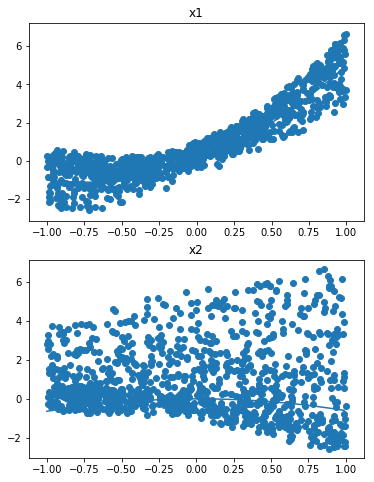

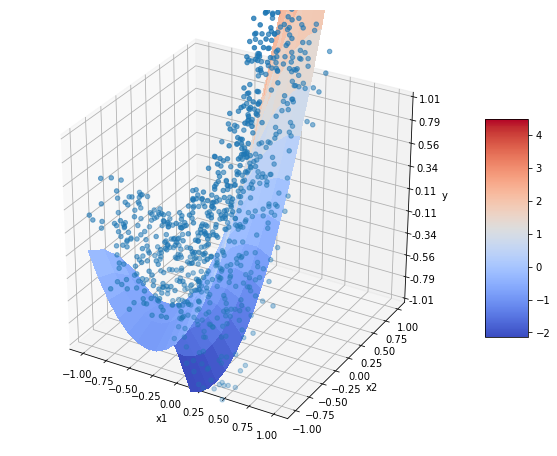

In [7]:
# plot the quadratic function
rr = np.arange(-1, 1, 0.01)

# 2D
plt.figure(figsize=(6,8))

plt.subplot(211)
plt.plot(rr, qfunc(rr,0,weights))
plt.scatter(df['x1'],df['y'])
plt.title('x1')

plt.subplot(212)
plt.plot(rr, qfunc(0,rr,weights))
plt.scatter(df['x2'],df['y'])
plt.title('x2')

# 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-1, 1, 0.1)
Y = np.arange(-1, 1, 0.25)
X, Y = np.meshgrid(X, Y)
Z = qfunc(X,Y,weights)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.scatter(result['x1'], result['x2'], result['y'])

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()